# Total Lecture Four:

- `Gary Image vs Colored Image`
- `HSV and HLC`
- `Thesolding Image`
- `Noise In Image`


<br>
<Br>

---
---

# Lecture One: Gray Image vs Colored Image

---
---


<br>
<Br>

# Understand the gray scale image:

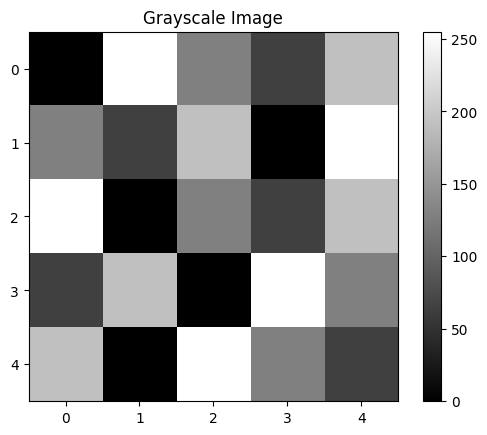

In [7]:
# Gray scale image or black-white image:

import numpy as np
import matplotlib.pyplot as plt

# Create a 2D NumPy array representing a black and white image
# Here, we create a 5x5 pixel image for demonstration
gray_image = np.array([
    [0, 255, 128, 64, 192],
    [128, 64, 192, 0, 255],
    [255, 0, 128, 64, 192],
    [64, 192, 0, 255, 128],
    [192, 0, 255, 128, 64]
], dtype=np.uint8)

# Display the grayscale image using matplotlib
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.colorbar()  # Display color bar for intensity values
plt.show()


<br>
<br>
<br>

---
---
---
---
---
---

<br>
<br>
<br>


### Color image or RGB image:

- If you have an RGB image of dimensions 100x100 pixels, it would typically be represented as a 3-dimensional NumPy array of shape (100, 100, 3), where each element represents a pixel and contains three values corresponding to the intensity of Red, Green, and Blue channels.


Let's make a np.array() like this. Using a ploting library like `matplotlib` draw the image.

```
Original Image:
[[[255   0   0]
  [  0 255   0]
  [  0   0 255]]

 [[128 128   0]
  [128   0 128]
  [  0 128 128]]

 [[ 64  64  64]
  [128 128 128]
  [192 192 192]]]

Red Channel:
[[255   0   0]
 [128 128   0]
 [ 64  64  64]]
```

### Explanation:
- The `image` array represents a small 3x3 RGB image with different color values.
- `image[:,:,0]` extracts the Red channel values from the image and stores them in `red_channel`.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
image = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
    [[128, 128, 0], [128, 0, 128], [0, 128, 128]],
    [[64, 64, 64], [128, 128, 128], [192, 192, 192]]
])

In [4]:
image.shape

(3, 3, 3)

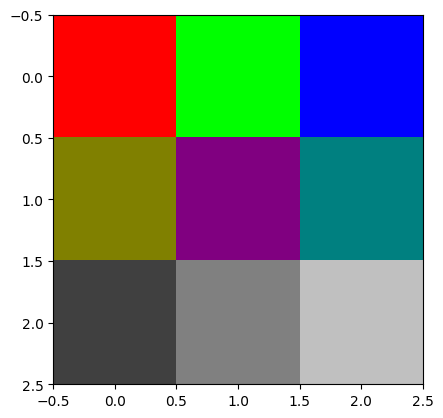

In [3]:
plt.imshow(image)

In [5]:
# In colored image, we have red, greed and blue 
# get the red channel value:

red = image[:,:,0] # similarly, 1 for green and 2 for red
red 

array([[255,   0,   0],
       [128, 128,   0],
       [ 64, 128, 192]])

In [14]:
img1 = image.copy()
img2 = image.copy()
img3 = image.copy()

img1[:,:,0] = 0
img2[:,:,1] = 0 
img3[:,:,2] = 0 

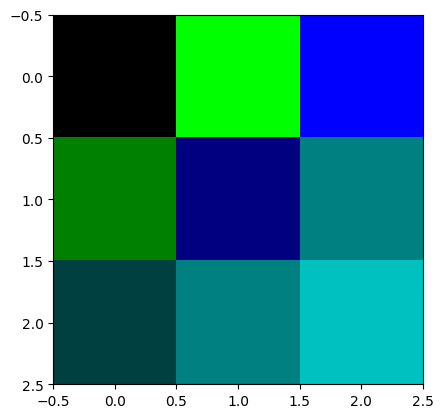

In [15]:
plt.imshow(img1) # red color is gone 

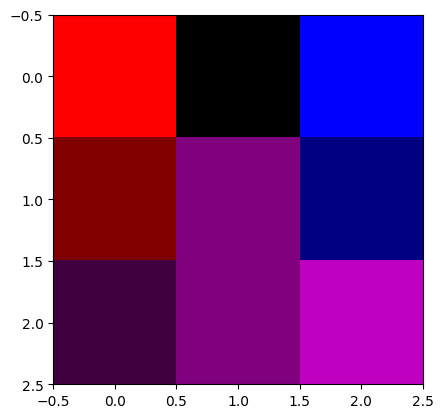

In [16]:
plt.imshow(img2) # green color is gone 

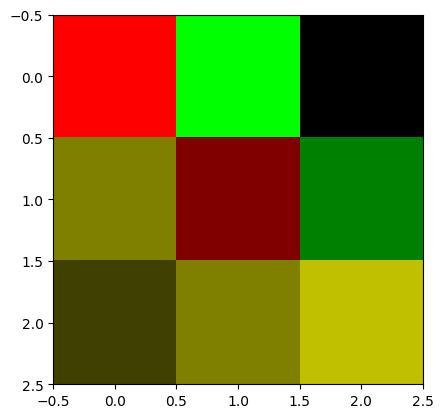

In [17]:
plt.imshow(img3) # blue color is gone 

In [28]:
import cv2 as cv 
colorImage = cv.imread('photo/coloredimage.jpg',cv.IMREAD_COLOR) # read image in color
grayImage = cv.imread('photo/grayImage.jpeg',cv.IMREAD_GRAYSCALE) # read image in grayscale

cm = np.array(colorImage)
gm = np.array(grayImage)

print(f"shpae of colorImage: {cm.shape}")
print(f"shpae of grayImage: {gm.shape}")


shpae of colorImage: (957, 1300, 3)
shpae of grayImage: (210, 240)


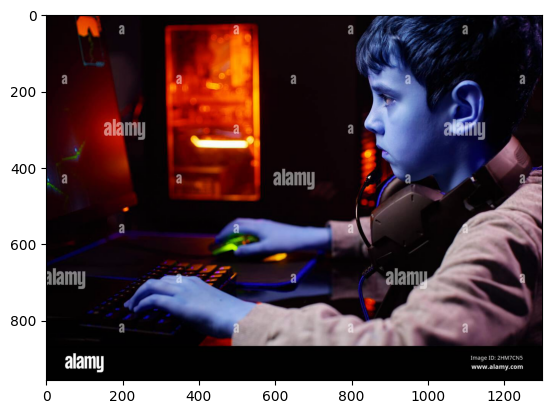

In [29]:
plt.imshow(colorImage)

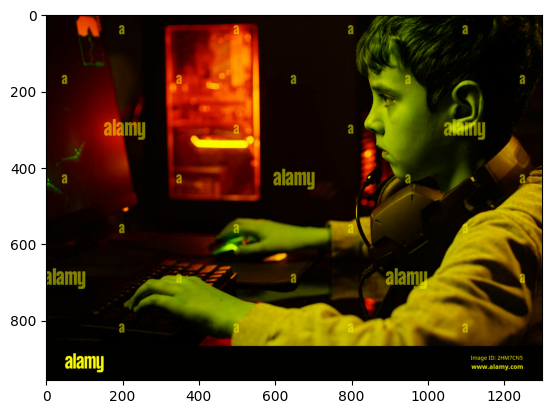

In [34]:
img4 = colorImage.copy()
img4[:,:,2] = 0 # set the value zero of blue channel
plt.imshow(img4)

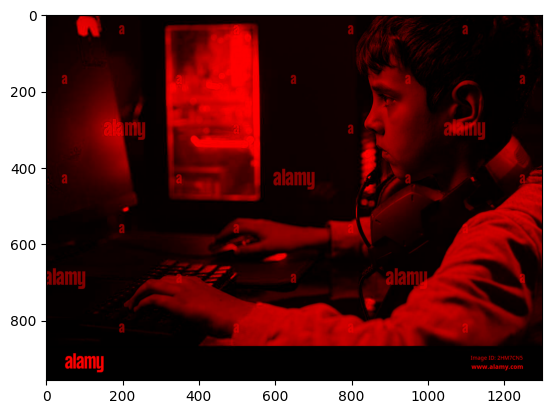

In [35]:
img4[:,:,1] = 0 
plt.imshow(img4)

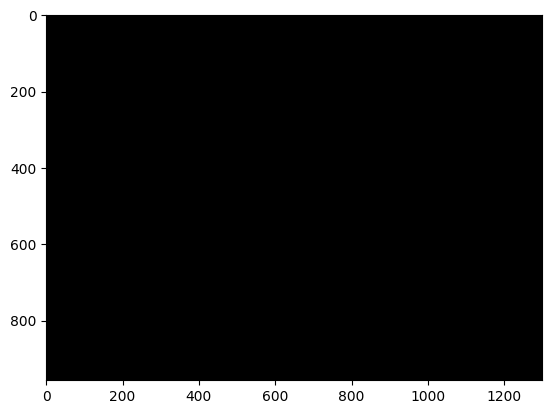

In [38]:

# set three channel zero, zero means black . If we set all the value 255 then we get white

img4[:,:,0] = 0  
plt.imshow(img4)

<br>
<Br>

---
---

# Lecture two: HSV 

---
---


<br>
<Br>

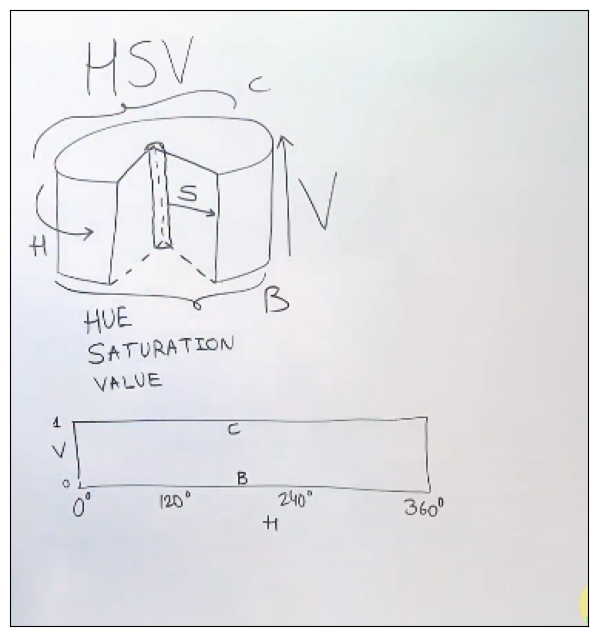

In [52]:
img = cv.imread('photo/image-1.png')
plt.figure(figsize=(10,8))
plt.xticks([])
plt.yticks([])
plt.imshow(img)


- **HUE:** `Hue is this circular angle which varies from 0 to 360 and hence just by selecting the range of hue you can select any color so you can see different colors are available at different angles so these colors are basically red yellow green cyan blue and magenta so hue is this angle in this cylindrical cone. অর্থাৎ Hue হচ্ছে একটা color band যেখানে (০-৩৬০) value এর মধ্যে সব color থাকবে । `

- **SATURATION:** `The saturation is amount of color that is the depth of pigment or the dominance of hue and this value is described from the center towards the outer layer of this cylindrical cone . অর্থাৎ, আমাদের কাছে SATURATION এর মান (০-১) এর মধ্যে হয় । আর যদি SATURATION = ০ হয় তাহলে সেই image হবে gray scale image because saturation is amount of color if saturation = 0 then color = 0 and it's a gray scale image. If saturation = 1 then it's a colorfull image. `

- **VALUE:** `the value is basically the brightness of the color so this brightness can be increased from zero to one from the bottom of the cone to the top of the cone. অর্থাৎ cylindrical cone উপরে আমাদের যেই কালার থাকুক না কেন তার  VALUE = 0 হলে তার color black হবে । আর VALUE = 1  হলে, সেই color সবুজ হলে, সবুজ . লাল হলে লাল দেখাবে । আর আমাদের cylindrical cone এর core টি সাদা হবে ।  `

<br>
<Br>

---
---

# Lecture two: Thesolding image

---
---


<br>
<Br>

আমরা যদি কোন sub এ ৮০ নাম্বার পাই তাহলে আমরা বলতে পারি বলতে পারি A+ । একে আমরা Thesolding এর সাথে তুলনা করতে পারি । আর, নাম্বার ৮০ কে thesold value এর সাথে তুলনা করতে পারি । Image is nothing but pixel কোন একটা pixel এর value, thesold value  এর চেয়ে বেশি হলে আমরা একটা করতে পারি আর কমে হলে আরেকটা condition apply করি । 

# Point to remember: 

- `For thesolding we need gray scale image.`


# type of thesholding:

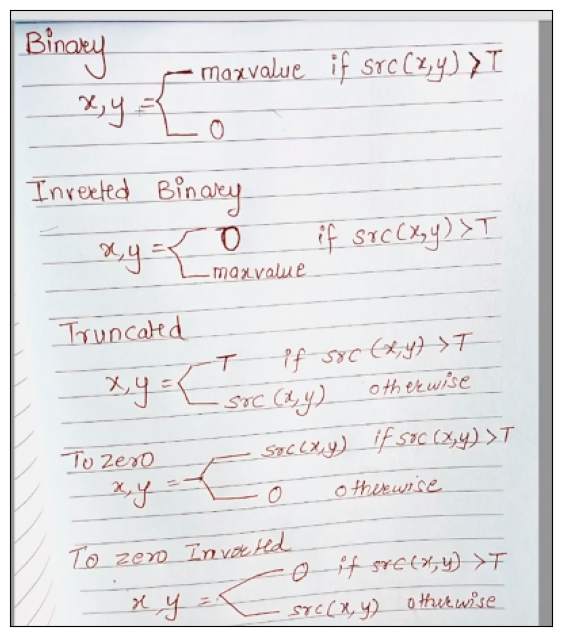

In [53]:
img = cv.imread('photo/image-5.png')
plt.figure(figsize=(10,8))
plt.xticks([])
plt.yticks([])
plt.imshow(img)


# Thesolding with openCV:


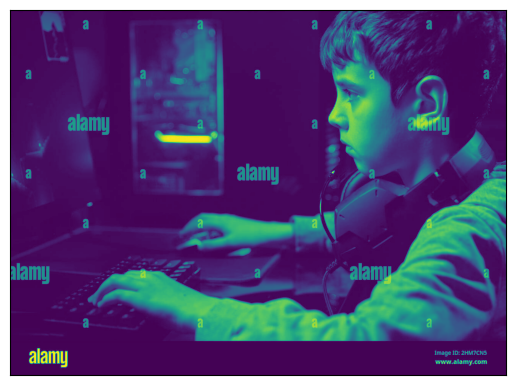

In [66]:
img = cv.imread("photo/coloredimage.jpg",cv.IMREAD_GRAYSCALE)
plt.xticks([])
plt.yticks([])
plt.imshow(img)

([], [])

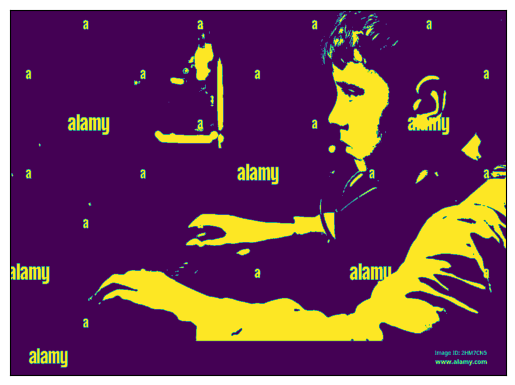

In [70]:
# thesold value = 80 , if any pixel is grater than 80 then assing that into 255 or while 
_,the = cv.threshold(img,100,255,cv.THRESH_BINARY) 
plt.imshow(the)
plt.xticks([])
plt.yticks([])

<br>
<Br>

---
---

# Lecture three: noise in image

---
---


<br>
<Br>